In [1]:
# Démarrage de l'exercice 2
import visualID as vID
from visualID import color
vID.init()

**Début à:** Monday 30 May 2022, 22:18:18  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"></img></p>

### Régression & stats. Suggestion de petite(s) application(s) en autonomie. Corrigé

#### Régression linéaire

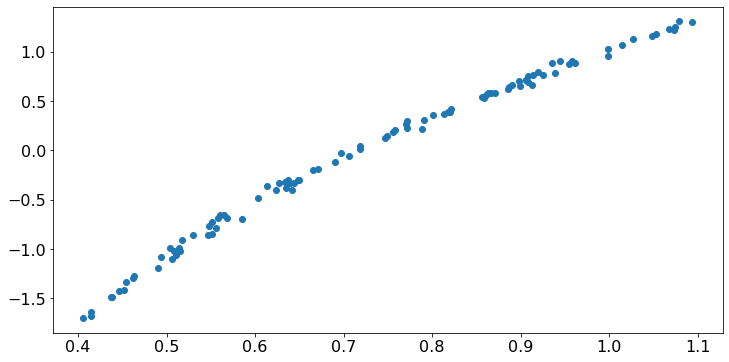

In [1]:
# lecture des data avec la fonction loadtxt de numpy & tracé du nuage de points
from pylab import *
import numpy as np

X, Y = np.loadtxt('data/f2.csv', delimiter='\t', unpack=True)
plt.rcParams["figure.figsize"] = (12,6) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (16) #on ajuste la taille des caractères
plt.plot(X, Y,linestyle='', marker='o')

In [2]:
from scipy.stats import linregress
fit = linregress(x=X, y=Y)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonnée à l'origine ={istderr:8.3f}")

a   =    4.258
b   =   -3.152
R^2 =  0.983
Erreur standard sur la valeur de la pente =   0.056
Erreur standard sur la valeur de l'ordonnée à l'origine =   0.043


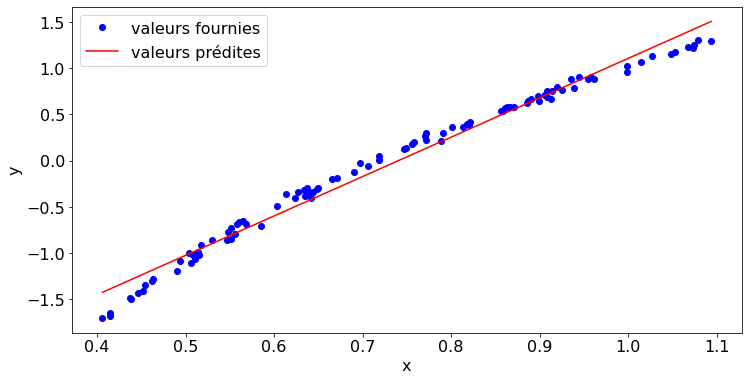

In [3]:
def y_hat(a,b,x):
    return a * x + b
# on calcule Y_hat la longueur prédite, pour chacune des valeurs de X fournies
Y_hat = y_hat(a,b,X)
plot(X, Y,linestyle='', marker='o', color='blue', label='valeurs fournies')
plot(X,Y_hat,color='red', label='valeurs prédites')
xlabel("x") # label de l'axe des abscisses
ylabel("y") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

In [4]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(Y,Y_hat):8.3f}\nMAE ={MAE(Y,Y_hat):8.3f}")

MSE =    0.012
MAE =   0.089


(-0.35, 0.35)

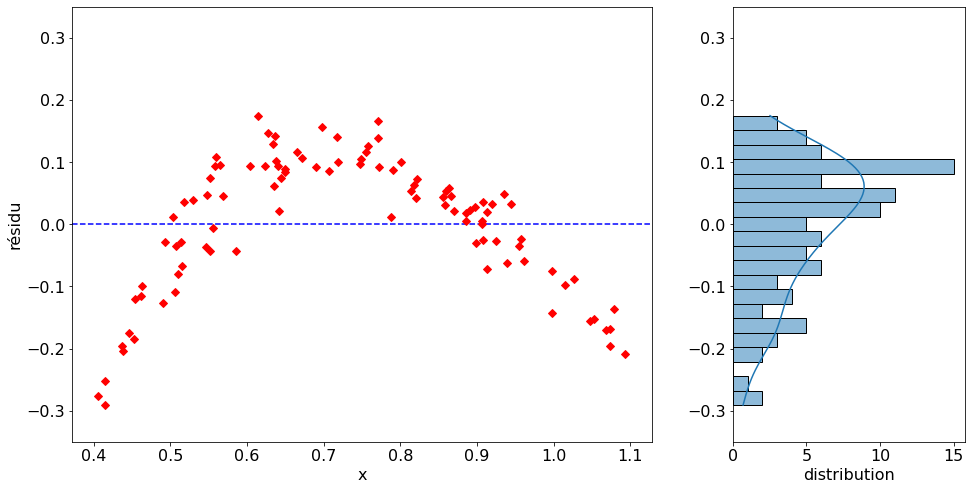

In [5]:
def residus(y,y_hat):
    return y-y_hat

import seaborn as sb
from matplotlib import gridspec
nbins=20
limit=0.35
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(X,residus(Y,Y_hat), linestyle='', marker="D", color='red')
xlabel("x")
ylabel("résidu")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("x")
xlabel("distribution")
sb.histplot(y=residus(Y,Y_hat),bins=nbins,kde=True)
plt.ylim(-limit,limit)

#### Régression logarithmique

[3.01888186 1.01789428]
  3.02ln(x) +   1.02
MSE =    0.001
MAE =   0.029


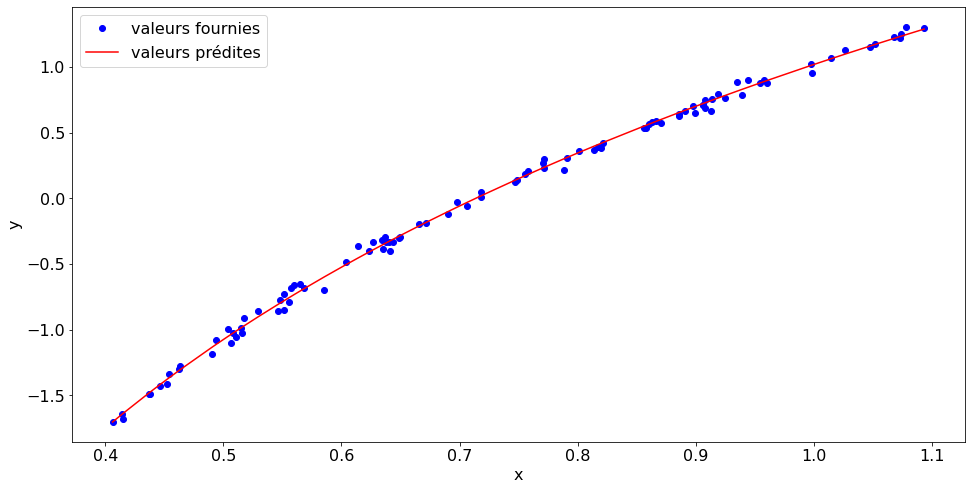

(-0.2, 0.2)

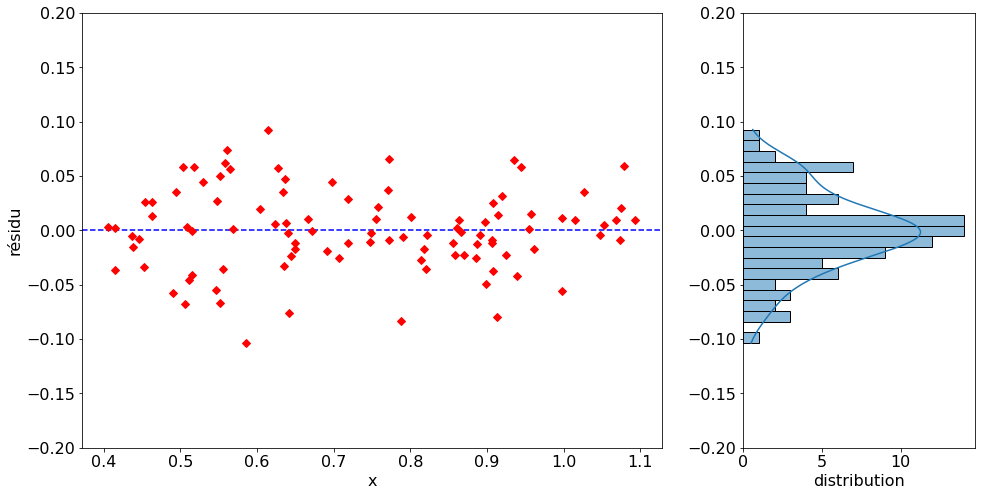

In [6]:
from scipy.optimize import curve_fit
from numpy import log as ln

def fln(x,a,b):
    return a*ln(x)+b

X, Y = np.loadtxt('data/f2.csv', delimiter='\t', unpack=True)
PFit, _ = curve_fit(fln, X, Y)
#affichage des paramètres du polynôme
print(PFit)
#affichage formaté
print(f"{PFit[0]:6.2f}ln(x) + {PFit[1]:6.2f}")

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
a=PFit[0]
b=PFit[1]
Y_hat=fln(X,a,b)
print(f"MSE = {MSE(Y,Y_hat):8.3f}\nMAE ={MAE(Y,Y_hat):8.3f}")

plot(X, Y,linestyle='', marker='o', color='blue', label='valeurs fournies')
plot(X,Y_hat,color='red', label='valeurs prédites')
xlabel("x") # label de l'axe des abscisses
ylabel("y") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe
show()

def residus(y,y_hat):
    return y-y_hat

import seaborn as sb
from matplotlib import gridspec
nbins=20
limit=0.2
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(X,residus(Y,Y_hat), linestyle='', marker="D", color='red')
xlabel("x")
ylabel("résidu")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("x")
xlabel("distribution")
sb.histplot(y=residus(Y,Y_hat),bins=nbins,kde=True)
plt.ylim(-limit,limit)

#### Régression d'un polynôme non bruité d'ordre 3

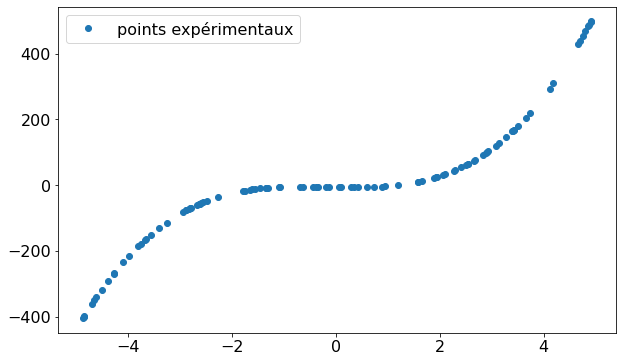

[ 4.  2. -3. -6.]
  4.00x^3 +   2.00x^2 +  -3.00x +  -6.00
MSE =    0.000
MAE =   0.000


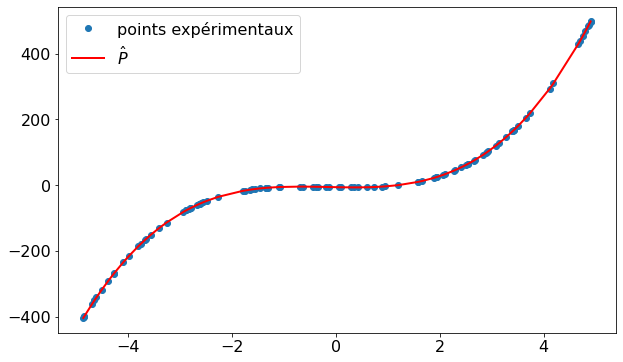

In [7]:
X, Y = np.loadtxt('data/fpolNoNoise.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)
plt.rcParams["figure.figsize"] = (10,6) #on ajuste la taille du graphique
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
legend()
plt.show()

# On appelle la routine polyfit avec les valeurs de X & Y, ainsi que l'ordre du polynôme. Elle va renvoyer les coefficients a, b, c, & d du polynôme, stockés dans la liste PFit5
PFit3 = np.polyfit(X, Y, 3)

#affichage des paramètres du polynôme
print(PFit3)
#affichage formaté
print(f"{PFit3[0]:6.2f}x^3 + {PFit3[1]:6.2f}x^2 + {PFit3[2]:6.2f}x + {PFit3[3]:6.2f}")

#inutile de faire des copier/coller des valeurs de a, b, c, d. On va utiliser directement poly1d, en lui passant PFit5 en paramètre
P_hat  = np.poly1d(PFit3)

# tracé des points
plt.plot(X, Y,linestyle='', marker='o', label="points expérimentaux")
plt.plot(X, P_hat(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(Y,P_hat(X)):8.3f}\nMAE ={MAE(Y,P_hat(X)):8.3f}")

In [2]:
vID.end()

**Fin à:** Monday 30 May 2022, 22:37:40  
**Durée:** 00:19:22 980ms

<p style="text-align: center"><img width="800px" src="./svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"></img></p>